In [1]:
import tensorflow as tf

In [2]:
# Declaring constants
c = tf.constant([-1.0, 2.0])

In [3]:
# Declaring variables

In [4]:
v = tf.Variable([1.0, 2.0])

In [5]:
# Show variable
v.numpy()

array([1., 2.], dtype=float32)

# Simple Optimization

In [6]:
opt = tf.optimizers.SGD()

In [7]:
# Gradient tapes!
with tf.GradientTape() as tape:
    y = tf.tensordot(c, v, 1) -1

In [8]:
tf.tensordot(c,v,1)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [9]:
# you can define it as a lambda function! It's the same thing.
#loss = lambda: tf.square(tf.tensordot(c,v,1)-1)
def loss():
    return tf.square(tf.tensordot(c,v,1)-1)

In [10]:
opt.minimize(loss, var_list=[v])

In [11]:
var_vals, loss_vals = [], []
for _ in range(100):
    opt.minimize(loss, var_list = [v])
    var_vals.append(v.numpy())
    loss_vals.append(loss())

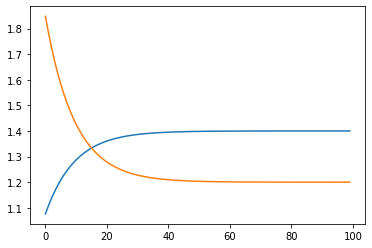

In [12]:
import matplotlib.pyplot as plt
plt.plot(var_vals)

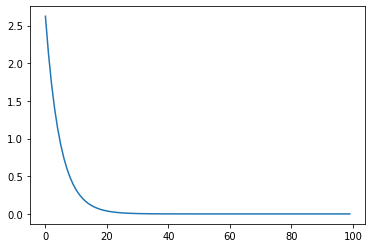

In [13]:
plt.plot(loss_vals)

# Optimising an integral function
# $\max_a \int_\Omega dP(\omega) f_\omega(a)$
# We can calculate the gradient as follows:
# $\nabla_a \int_\Omega dP(\omega) f_\omega(a) = \int_\Omega dP(\omega) \nabla_a f_\omega(a)$
# This is actually identical to the expected gradient:
# $\int_\Omega dP(\omega) [\nabla_a f_\omega(a)] = E_{\omega \sim P} [\nabla_a f_\omega(a)]$
# Consequently,
# $E_{\omega \sim P} [\nabla_a f_\omega(a)]  \approx \frac{1}{K} \sum_{k=1}^K [\nabla_a f_{\omega^k}(a)]$ with $\omega^k \sim P$. 
# In addition
# $E_{\omega \sim P} [\nabla_a f_\omega(a)] = E_{\omega^{k} \sim P} \{ \frac{1}{K} \sum_{k=1}^K [\nabla_a f_{\omega^k}(a)] \}$. 

In [14]:
import tensorflow_probability as tfp
tfd = tfp.distributions
dist = tfd.Normal(loc=1,scale=1)


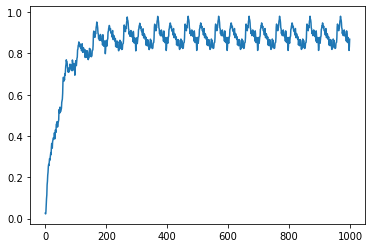

In [15]:
import tensorflow as tf
opt = tf.optimizers.SGD()
import numpy as np
a = tf.Variable(0.0) # my action variable

## Sample from the distribution
n_samples=100
omega = dist.sample([n_samples]) 

## minimise the squared difference
loss = lambda : (sample - a)**2 #loss function

## Loop set-up
n_iter=int (1000 / n_samples)
n_steps = n_iter * n_samples
value = np.zeros(n_steps) # save the values

# Hand implementation of SGD
t=0
for _ in range(n_iter):
    for i in range(n_samples):
        # fill in!
        sample = tf.constant(omega[i])
        opt.minimize(loss, var_list=[a])
        value[t] = a
        t+=1
# Plot result
import matplotlib.pyplot as plt
plt.plot(value)

In [16]:
omega

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 1.3223017 , -0.16216314,  0.48805338,  1.6982319 ,  1.5891457 ,
        1.031867  ,  2.572099  ,  0.9810492 ,  1.6855717 ,  0.9398099 ,
        1.6095955 ,  0.7539996 ,  0.01526392,  1.0324743 ,  1.1373962 ,
       -0.07760549,  0.838169  ,  0.74338245,  1.148566  , -0.17842102,
        2.0477333 ,  1.3108156 , -0.09380472, -0.3155682 ,  1.8928533 ,
        0.7314577 ,  0.87332124,  0.5153047 ,  0.14156938,  0.7474023 ,
        1.4693627 , -1.0781646 ,  1.7938588 ,  1.1816672 ,  0.32647943,
       -0.05736017,  2.3421745 ,  0.49155885,  1.0509897 ,  0.4894402 ,
       -0.81663346,  0.6627873 ,  1.196369  ,  0.811756  ,  0.8852307 ,
        2.9286156 ,  0.61399573, -0.35294282,  1.9472978 , -0.7404256 ,
        0.85144955,  0.499242  ,  0.92991275,  0.83308434,  1.957066  ,
        1.0065278 ,  0.9338704 ,  1.9336573 ,  3.468371  ,  1.6805372 ,
        0.70190203, -0.2411058 ,  1.4831612 ,  0.16016364,  2.0873983 ,
        0.461774

In [18]:
np.mean(omega)

0.88758004